<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/2021%E5%B9%B41%E6%9C%8826%E6%97%A5%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [31]:
#中学2年生の成績データ（国数英理社、音楽、体育、技家、美術）
df = pd.read_csv("seiseki.csv")
df

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90
162,0,8,2,9,5,18,42,2,1
163,45,26,29,24,31,57,68,40,27
164,73,31,43,32,59,64,82,48,56


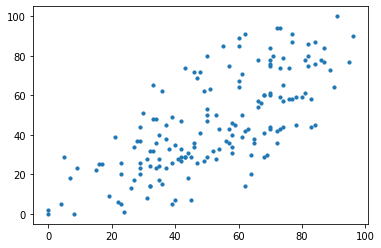

In [32]:
#散布図可視化
plt.scatter(df["kokugo"],df["sugaku"],s=10)
plt.show()

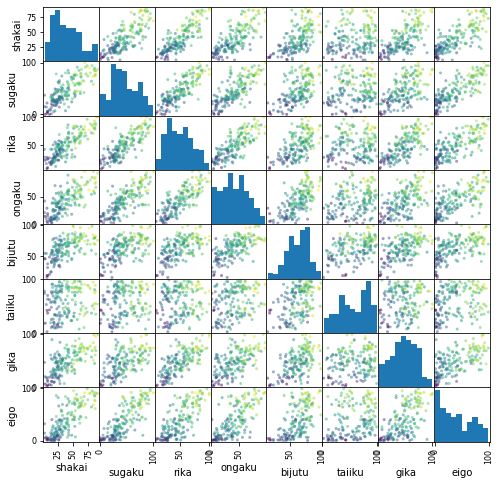

In [33]:
#全ての組み合わせの散布図を可視化
from pandas import plotting
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]),alpha=0.5)
plt.show()

In [34]:
#主成分分析の実行
from sklearn.decomposition import PCA
#主成分分析の実行
pca = PCA()
pca.fit(df)
#データを主成分空間に写像
feature = pca.transform(df)

In [35]:
#主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(df.columns))])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-6.438840,23.899147,5.840911,31.056522,9.281414,-4.733893,-1.490574,10.837494,-1.346071
1,-2.157204,2.043280,23.641251,30.484755,17.242403,-11.400472,-14.082870,-9.420689,0.078384
2,-22.651879,19.199671,30.638257,36.221020,6.943012,-25.105234,4.939629,1.870199,2.429156
3,116.513709,1.907651,18.116368,-7.707673,3.998059,6.263182,10.467513,6.997275,6.660326
4,54.565790,20.228717,8.168062,23.146435,-10.398452,6.935979,-0.387462,1.397147,-12.754745
...,...,...,...,...,...,...,...,...,...
161,101.016510,-4.140593,-3.594470,-3.687472,15.219326,5.249523,10.371473,2.780456,1.183286
162,-116.038767,1.565760,-21.268937,-6.153689,16.351829,-0.535380,12.017787,5.857895,-5.301036
163,-33.522384,-18.749731,0.520979,-6.829732,-0.812935,-3.330359,0.197681,-6.206510,-8.672114
164,15.392936,-29.486657,-6.796834,-5.818778,-0.691262,-8.637742,5.383293,-25.644149,-5.925855


In [36]:
#PCAの固有ベクトル
pd.DataFrame(np.round(pca.components_.T,3),
             index = df.columns,
             columns = ["PC{}".format(x+1) for x in range(len(df.columns))])
#符号は関係ない

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
kokugo,0.341,-0.120,0.119,-0.146,-0.533,0.340,0.216,-0.572,0.244
shakai,0.340,0.117,0.029,0.004,-0.206,0.249,0.530,0.533,-0.448
sugaku,0.378,0.170,-0.325,0.214,0.064,0.468,-0.619,-0.058,-0.258
rika,0.337,0.200,0.119,0.182,0.200,0.136,0.026,0.372,0.776
ongaku,0.348,-0.006,0.021,0.641,0.310,-0.328,0.305,-0.384,-0.152
bijutu,0.223,-0.160,0.196,0.241,-0.601,-0.501,-0.387,0.257,-0.010
taiiku,0.164,-0.927,-0.006,-0.024,0.247,0.162,-0.030,0.156,0.009
gika,0.303,0.124,0.747,-0.370,0.315,-0.049,-0.208,-0.087,-0.215
eigo,0.470,0.046,-0.519,-0.542,0.108,-0.445,0.041,-0.026,0.051


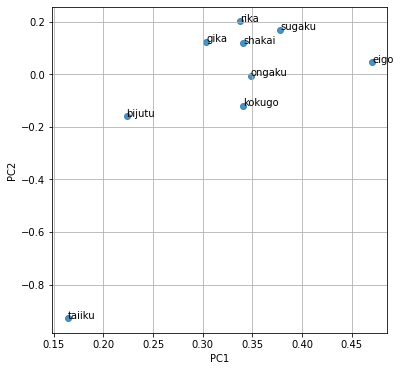

In [37]:
#第一主成分と第二主成分における観測変数の寄与度を可視化
plt.figure(figsize=(6,6))
for x,y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:]):
    plt.text(x,y,name)
plt.scatter(pca.components_[0], pca.components_[1],alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

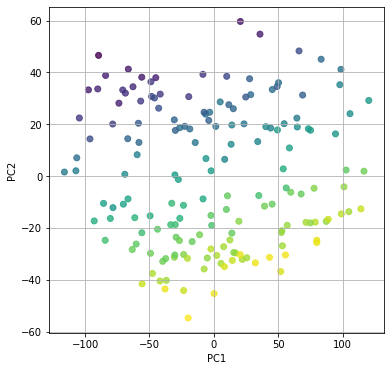

In [38]:
#第一主成分と第二主成分で可視化（体育の点で色付け）
plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1],alpha=0.8, c=list(df.iloc[:,6]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [39]:
#寄与率
pd.DataFrame(pca.explained_variance_ratio_,
             index=["PC{}".format(x+1) for x in range(len(df.columns))])
#65.7%+14.4%=80%!!!

,0
PC1,0.657283
PC2,0.144536
PC3,0.055471
PC4,0.043258
PC5,0.025642
PC6,0.022355
PC7,0.022054
PC8,0.017499
PC9,0.011901


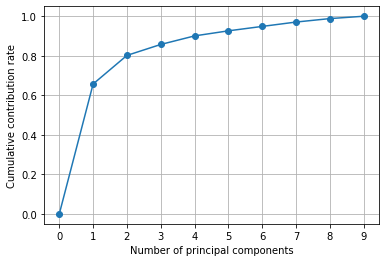

In [40]:
#累積寄与率を可視化。１でだいぶ、２で0.8到達
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [41]:
#自動車データ（燃費、ｼﾘﾝﾀﾞｰ数、排気量、馬力、etc、、、）
df = pd.read_csv("mtcars.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


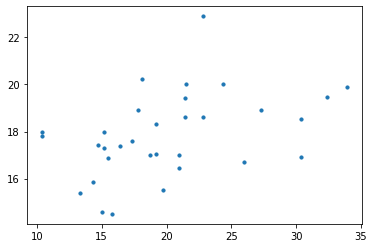

In [42]:
plt.scatter(df["mpg"],df["qsec"],s=10)
plt.show()

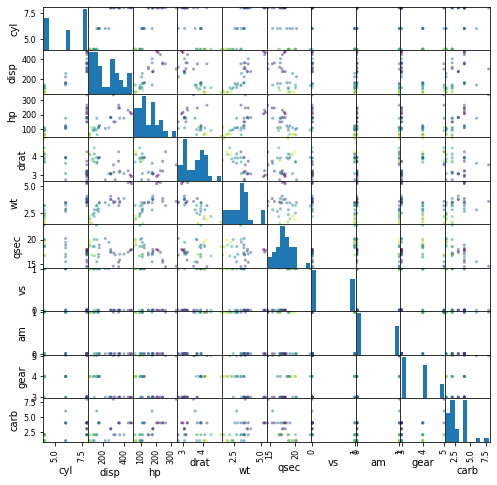

In [43]:
from pandas import plotting
df = df.drop("model", axis = 1)
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]),alpha=0.5)
plt.show()

In [44]:
#標準化
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
column_name = df.columns
df = sc.fit_transform(df)
df = pd.DataFrame(df)
df.columns = column_name
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083
5,-0.335572,-0.106668,-0.046906,-0.617748,-1.589643,0.252064,1.348220,1.133893,-0.827170,-0.946729,-1.140108
6,-0.976163,1.031121,1.059772,1.456847,-0.734549,0.366285,-1.142114,-0.881917,-0.827170,-0.946729,0.746967
7,0.726459,-1.244457,-0.688779,-1.254944,0.177551,-0.028296,1.223135,1.133893,-0.827170,0.430331,-0.511083
8,0.456737,-1.244457,-0.737144,-0.765933,0.614599,-0.069830,2.871986,1.133893,-0.827170,0.430331,-0.511083
9,-0.150138,-0.106668,-0.517448,-0.351014,0.614599,0.231297,0.256567,1.133893,-0.827170,0.430331,0.746967


In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
feature = pca.transform(df)

In [46]:
pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(df.columns))])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.657213,1.735446,-0.601199,0.115522,-0.960653,-0.017259,-0.433311,0.009785,-0.148766,-0.067771,-0.182569
1,0.629396,1.550033,-0.382322,0.202307,-1.032949,-0.245592,-0.422860,0.085873,-0.075721,-0.128959,-0.090063
2,2.779397,-0.146457,-0.241238,-0.249139,0.405143,-0.354348,-0.618584,-0.594620,0.133328,0.046470,0.096147
3,0.311771,-2.363019,-0.135759,-0.511862,0.557997,0.019606,-0.041007,0.050376,-0.223742,-0.061366,-0.149973
4,-1.974489,-0.754402,-1.134402,0.075653,0.210836,0.151580,0.389645,0.162863,0.021515,-0.060787,-0.148750
5,0.056138,-2.786000,0.163826,-0.990771,0.215052,-0.247737,-0.299356,-0.260718,0.032745,-0.204881,-0.019858
6,-3.002674,0.334887,-0.362759,-0.052354,0.349350,0.724096,-0.138255,0.173841,0.181301,0.366641,-0.174613
7,2.055329,-1.465181,0.943895,-0.144403,-0.321718,-0.001005,0.649694,-0.165767,-0.383016,0.295519,0.019396
8,2.287408,-1.983526,1.797241,0.291807,-0.339022,-0.339213,0.631963,0.107473,0.878387,-0.117826,-0.162244
9,0.526381,-0.162013,1.492770,0.067324,-0.070738,0.829596,0.163750,-0.101583,-0.549580,-0.224473,0.126478


In [47]:
pd.DataFrame(np.round(pca.components_.T,3),
             index = df.columns,
             columns = ["PC{}".format(x+1) for x in range(len(df.columns))])
#符号は関係ない

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
mpg,0.363,0.016,-0.226,-0.023,0.103,-0.109,0.368,0.754,-0.236,0.139,0.125
cyl,-0.374,0.044,-0.175,-0.003,0.058,0.169,0.057,0.231,-0.054,-0.846,0.141
disp,-0.368,-0.049,-0.061,0.257,0.394,-0.336,0.214,-0.001,-0.198,0.049,-0.661
hp,-0.330,0.249,0.140,-0.068,0.540,0.071,-0.001,0.222,0.576,0.248,0.256
drat,0.294,0.275,0.161,0.855,0.077,0.244,0.021,-0.032,0.047,-0.101,0.040
wt,-0.346,-0.143,0.342,0.246,-0.075,-0.465,-0.021,0.009,-0.359,0.094,0.567
qsec,0.200,-0.463,0.403,0.068,-0.165,-0.330,0.050,0.232,0.528,-0.271,-0.181
vs,0.307,-0.232,0.429,-0.215,0.600,0.194,-0.266,-0.026,-0.359,-0.159,-0.008
am,0.235,0.429,-0.206,-0.030,0.090,-0.571,-0.587,0.060,0.047,-0.178,-0.030
gear,0.207,0.462,0.290,-0.265,0.048,-0.244,0.605,-0.336,0.002,-0.214,0.054


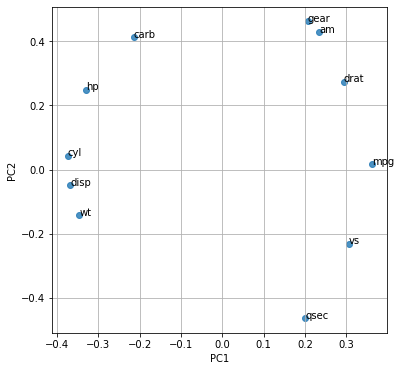

In [48]:
plt.figure(figsize=(6,6))
for x,y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:]):
    plt.text(x,y,name)
plt.scatter(pca.components_[0], pca.components_[1],alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

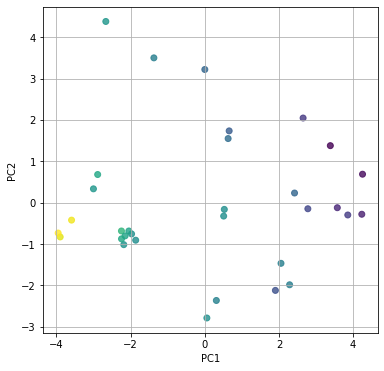

In [49]:
#第一主成分と第二主成分で可視化（車重で色付け）
plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1],alpha=0.8, c=list(df.iloc[:,5]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [50]:
pd.DataFrame(pca.explained_variance_ratio_,
             index=["PC{}".format(x+1) for x in range(len(df.columns))])

,0
PC1,0.600764
PC2,0.240952
PC3,0.057018
PC4,0.024509
PC5,0.020314
PC6,0.019236
PC7,0.012297
PC8,0.011173
PC9,0.007004
PC10,0.004730


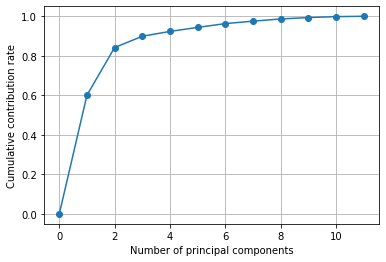

In [51]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [52]:
#乳がんに関するデータ（腫瘍が悪性か良性かを分類）
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
#データをmalignant（悪性）かbenign（良性）に分類するフィルター処理
#malignant(悪性)はcancer.targetが0
malignant = cancer.data[cancer.target==0]
#benign（良性)はcancer.targetが0
benign = cancer.data[cancer.target==1]

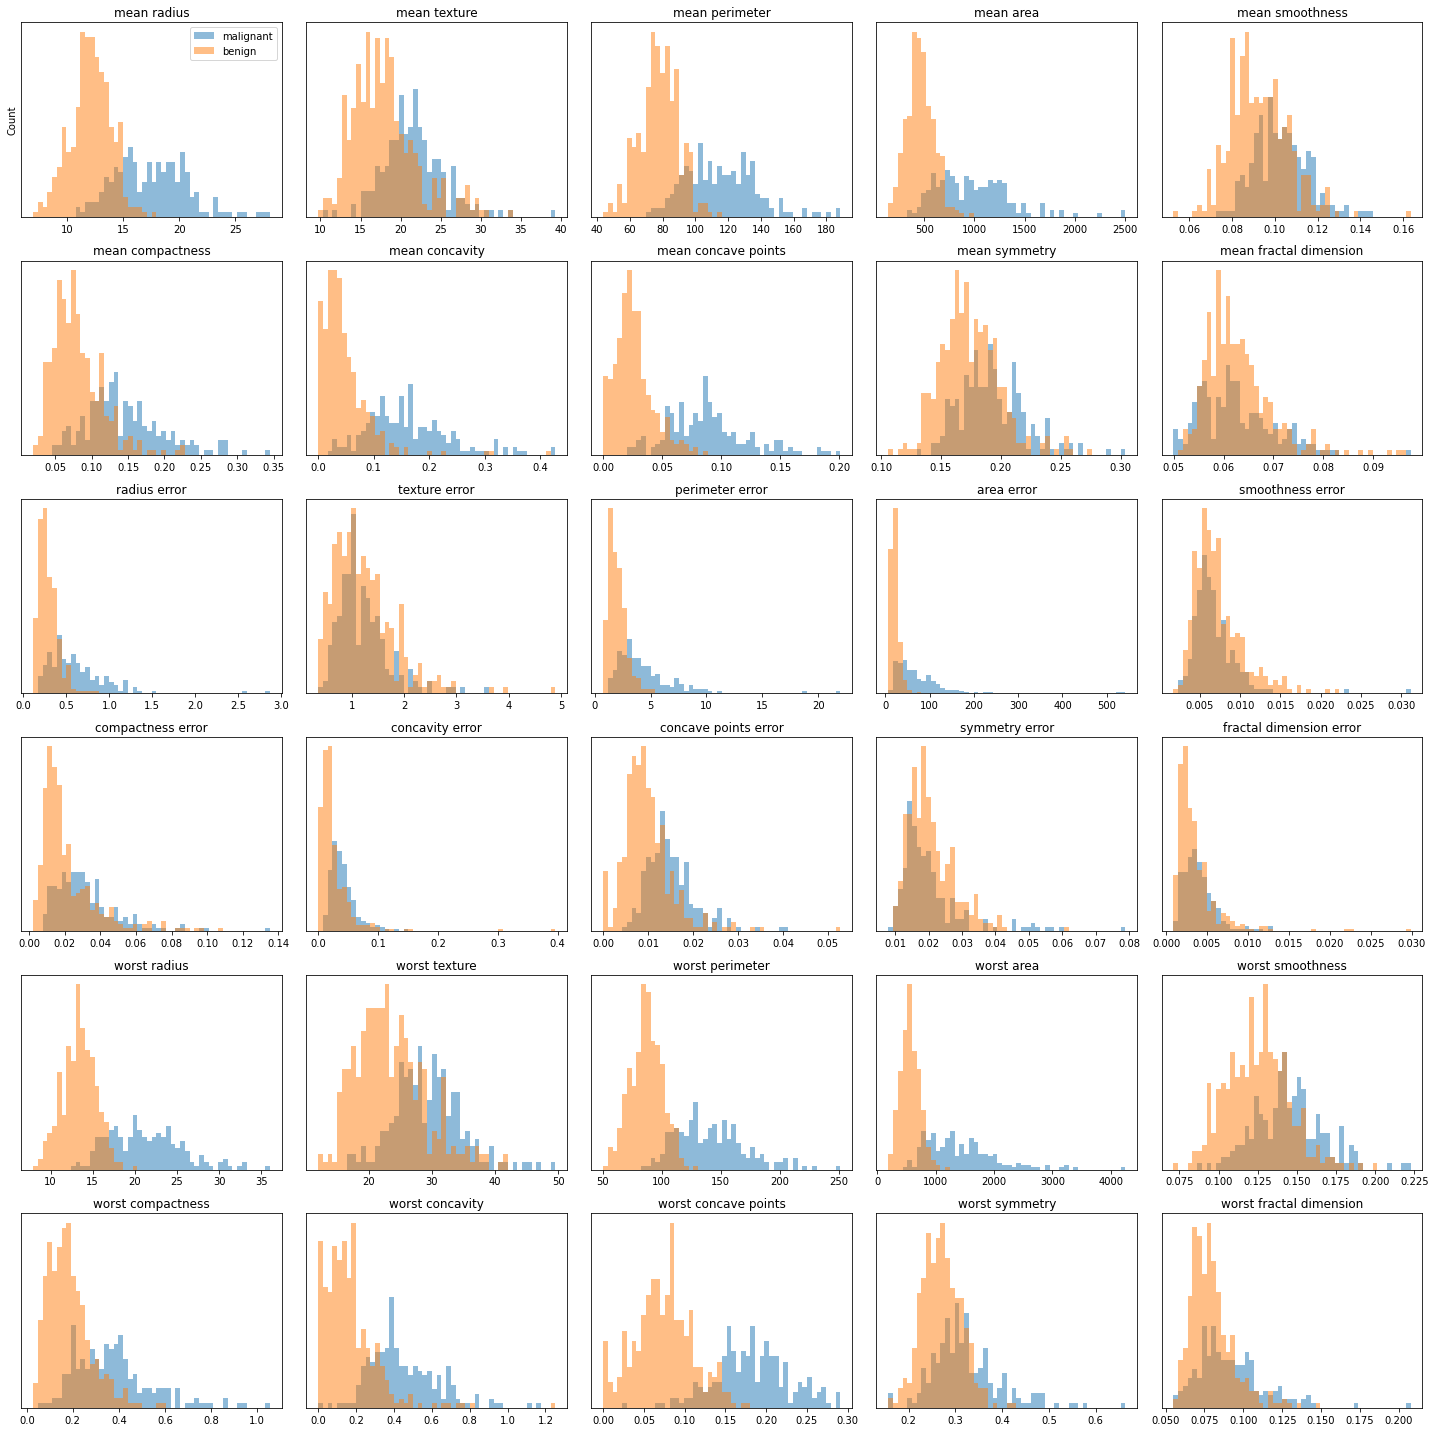

In [58]:
#malignant（悪性）がブルー、benign（良性）がオレンジ
#各図は各々の説明変数と目的変数との関係を示したﾋｽﾄｸﾞﾗﾑ
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i],bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_ylabel("Count")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()


In [61]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print("X_pca shape:{}".format(X_pca.shape))
print("Explained variance ratio:{}".format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.44272026 0.18971182]


In [62]:
X_pca = pd.DataFrame(X_pca, columns=["pc1", "pc2"])

X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=["target"])], axis=1)
pca_malignant = X_pca[X_pca["target"]==0]
pca_benign = X_pca[X_pca["target"]==1]

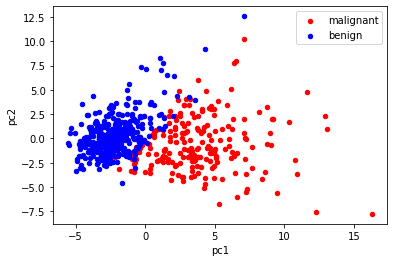

In [65]:
ax = pca_malignant.plot.scatter(x="pc1", y="pc2", color="red", label="malignant");
pca_benign.plot.scatter(x="pc1", y="pc2", color="blue", label="benign", ax=ax);